# Cartoonise an Image

## Import libraries


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#Upload image
test_image1 = cv2.imread('Lenna.png')
test_image2 = cv2.imread('img.jpg')

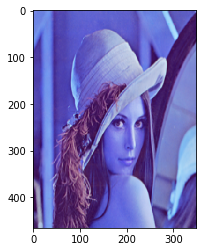

In [10]:
#Re-size the image
test_image1 = cv2.resize(test_image1, (350, 466))
test_image2 = cv2.resize(test_image2, (350, 466))
plt.imshow(test_image1)


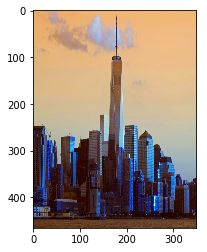

In [11]:
plt.imshow(test_image2)

### Converting the image from BGR to RGB

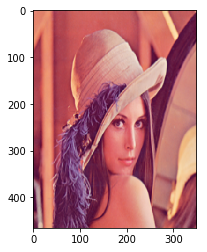

In [15]:
test_image1 = cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB)
def display(test_image):
    plt.figure(figuresize=(10,10))
plt.imshow(test_image1)


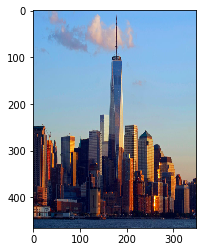

In [16]:
test_image2 = cv2.cvtColor(test_image2, cv2.COLOR_BGR2RGB)
def display(test_image):
    plt.figure(figuresize=(10,10))
plt.imshow(test_image2)


### Histogram Representation

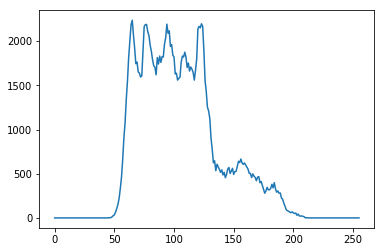

In [17]:
hist1 = cv2.calcHist([test_image1], [2], None, [256], [0, 256])
plt.plot(hist1)

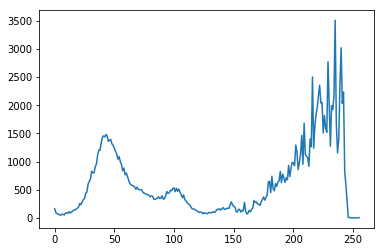

In [18]:
hist2 = cv2.calcHist([test_image2], [2], None, [256], [0, 256])
plt.plot(hist2)

### Converting the images to gray scale

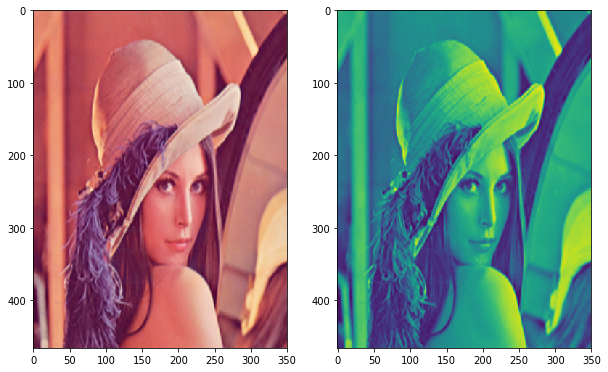

In [19]:
gray_image1 = cv2.cvtColor(test_image1, cv2.COLOR_RGB2GRAY)
def display(x,y):
    f , (ax1,ax2) = plt.subplots(1,2, figsize = (10,10))
    ax1.imshow(x)
    ax2.imshow(y)
display(test_image1, gray_image1)


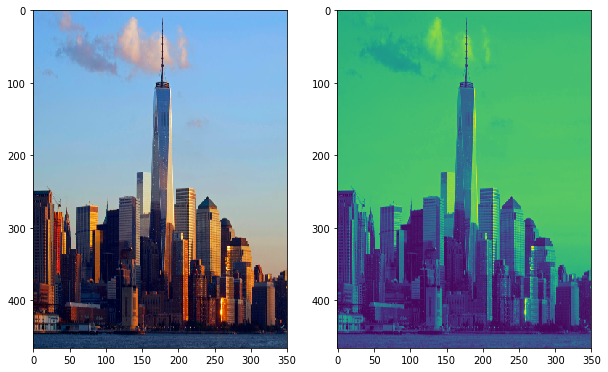

In [20]:
gray_image2 = cv2.cvtColor(test_image2, cv2.COLOR_RGB2GRAY)
def display(x,y):
    f , (ax1,ax2) = plt.subplots(1,2, figsize = (10,10))
    ax1.imshow(x)
    ax2.imshow(y)
display(test_image2, gray_image2)


In [21]:
num_down = 2
num_bilateral = 7

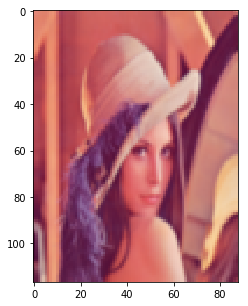

In [22]:
colour_image1 = test_image1
for i in range(num_down):
    colour_image1 = cv2.pyrDown(colour_image1)
plt.figure(figsize=(5,5))
plt.imshow(colour_image1)


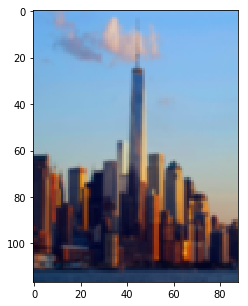

In [23]:
colour_image2 = test_image2
for i in range(num_down):
    colour_image2 = cv2.pyrDown(colour_image2)
plt.figure(figsize=(5,5))
plt.imshow(colour_image2)

### Apply bilateral filter

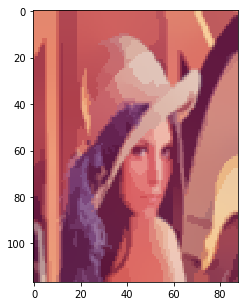

In [25]:
for i in range(num_bilateral):
    colour_image1 = cv2.bilateralFilter(colour_image1, d=9,
                                    sigmaColor=9,
                                    sigmaSpace=7)
plt.figure(figsize=(5,5))
plt.imshow(colour_image1)

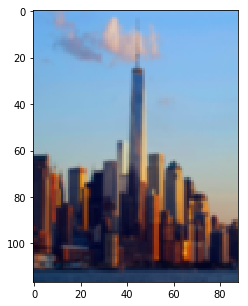

In [26]:
for i in range(num_bilateral):
    colour_image1 = cv2.bilateralFilter(colour_image2, d=9,
                                    sigmaColor=9,
                                    sigmaSpace=7)
plt.figure(figsize=(5,5))
plt.imshow(colour_image2)

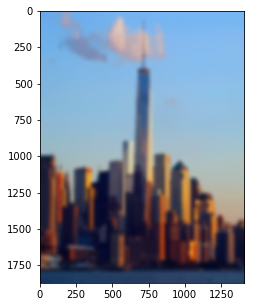

In [29]:
for i in range(num_down):
    colour_image1 = cv2.pyrUp(colour_image1)
plt.figure(figsize=(5,5))
plt.imshow(colour_image1)

### Pre-processing image with median filter

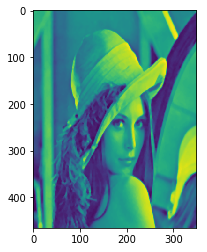

In [30]:
gray_image1 = cv2.medianBlur(gray_image1, 5)
plt.imshow(gray_image1)

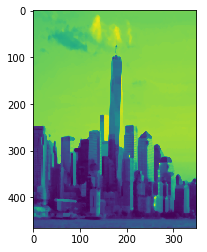

In [31]:
gray_image2 = cv2.medianBlur(gray_image2, 5)
plt.imshow(gray_image2)

### Edge enhancemment using thresholding


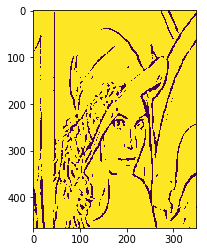

In [33]:
edges1 = cv2.adaptiveThreshold(gray_image1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
plt.imshow(edges1)


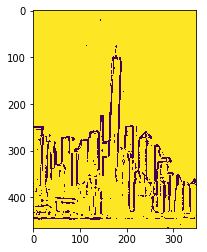

In [34]:
edges2 = cv2.adaptiveThreshold(gray_image2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
plt.imshow(edges2)


### Bilateral filter with edge preservation

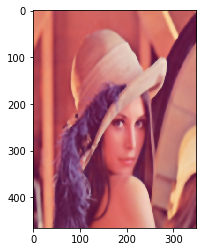

In [35]:
colour_image1 = cv2.bilateralFilter(test_image1, 9, 150, 150)
plt.imshow(colour_image1)


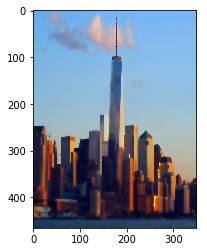

In [41]:
colour_image2 = cv2.bilateralFilter(test_image2, 9, 150, 150)
plt.imshow(colour_image2)


### Cartoonised Image

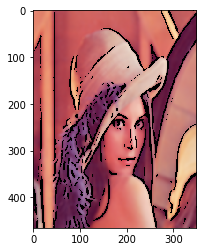

In [37]:
cartoonised_image1 =  cv2.bitwise_and(colour_image1, colour_image1, mask=edges1)
plt.imshow(cartoonised_image1)


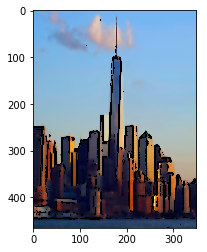

In [40]:
cartoonised_image2 =  cv2.bitwise_and(colour_image2, colour_image2, mask=edges2)
plt.imshow(cartoonised_image2)
